In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from collections import Counter

In [ ]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
def confusion_matrix(y_true, y_pred, classes):
    n_classes = len(classes)
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[true][pred] += 1
    return cm

In [ ]:
cm = confusion_matrix(y_test, y_pred, class_names)

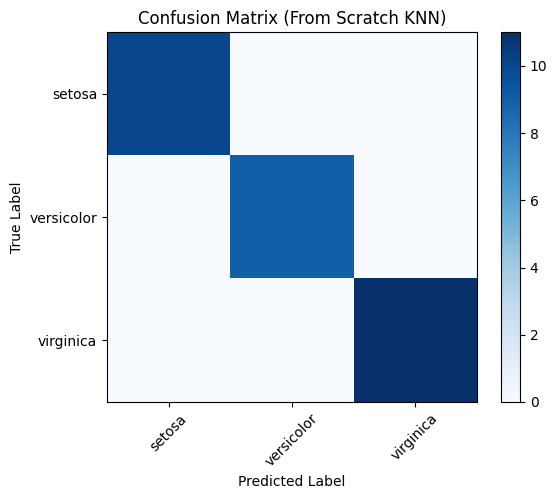

In [ ]:
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix (From Scratch KNN)')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print(f"Accuracy: {accuracy(y_test, y_pred):.2f}")
print('\nConfusion Matrix:')
print(cm)

Accuracy: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


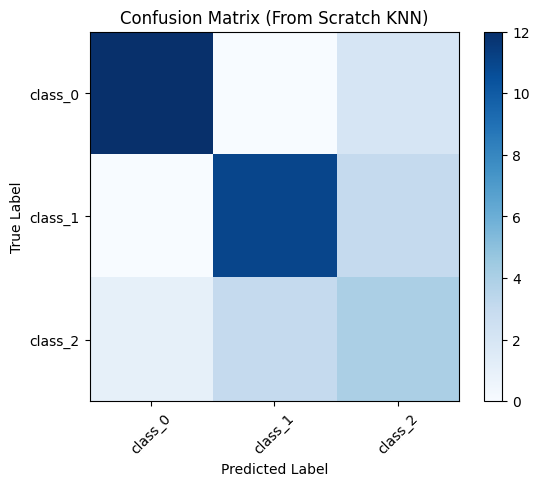

Accuracy: 0.75

Confusion Matrix:
[[12  0  2]
 [ 0 11  3]
 [ 1  3  4]]


In [ ]:
from sklearn.datasets import load_wine
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

wine = load_wine()
X = wine.data
y = wine.target
class_names = wine.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

def confusion_matrix(y_true, y_pred, classes):
    n_classes = len(classes)
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[true][pred] += 1
    return cm

cm = confusion_matrix(y_test, y_pred, class_names)

plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix (From Scratch KNN)')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print(f"Accuracy: {accuracy(y_test, y_pred):.2f}")
print('\nConfusion Matrix:')
print(cm)

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

class KNNRegressor:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_values = [self.y_train[i] for i in k_indices]
            predictions.append(np.mean(k_nearest_values))
        return np.array(predictions)

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2))

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

knn_reg = KNNRegressor(k=5)
knn_reg.fit(X_train, y_train)
predictions = knn_reg.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'From Scratch KNN MSE: {mse:.2f}')

sk_knn_reg = KNeighborsRegressor(n_neighbors=5)
sk_knn_reg.fit(X_train, y_train)
sk_mse = mean_squared_error(y_test, sk_knn_reg.predict(X_test))
print(f'Sklearn KNN MSE: {sk_mse:.2f}')

From Scratch KNN MSE: 5197.24
Sklearn KNN MSE: 5197.24


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [ ]:
X_train_2d = pca.transform(X_train)
X_test_2d = pca.transform(X_test)

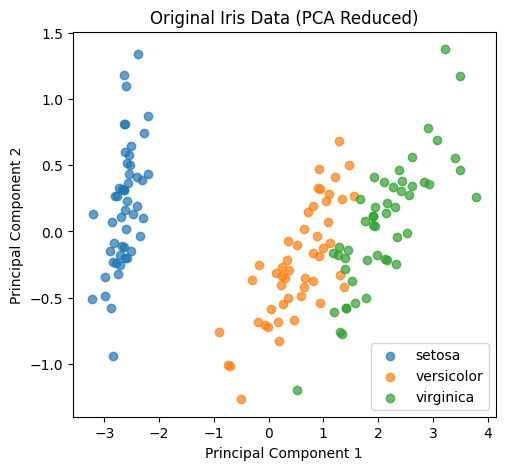

In [ ]:
# Change iris.taget_names to iris.target_names
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i, name in enumerate(iris.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], label=name, alpha=0.7)
    plt.title('Original Iris Data (PCA Reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()